<a href="https://colab.research.google.com/github/ryansantos1174/PolarisProject2026/blob/main/HZZAnalysisWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to rediscover the Higgs boson yourself!

<CENTER><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/images/ATLASOD.gif?raw=1" style="width:50%"></CENTER>

This notebook uses ATLAS Open Data http://opendata.atlas.cern 2025 beta release to show you the steps to rediscover the Higgs boson yourself!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text


### What is the Higgs boson?
The Higgs boson is a fundamental particle predicted by the Standard Model.
It is a manifestation of the Higgs field,
    which gives mass to the fundamental particles.
However,
    it is incredibly hard to produce.
At the LHC,
    a Higgs particle is produced about once every 10 billion collisions!
This tiny fraction makes it very difficult to detect.
Nevertheless,
    after years of data collection,
    the Higgs boson was finally discovered in 2012 by CMS and ATLAS experiments at CERN.
In this tutorial,
    we shall be following their example.


### Detecting the Higgs
This analysis loosely follows the paper on the [discovery of the Higgs boson by ATLAS](https://www.sciencedirect.com/science/article/pii/S037026931200857X) (mostly Section 4 and 4.1).

The Higgs boson can be produced in many different ways.
In particle physics,
    we describe these production modes using Feynman diagrams.
These diagrams allow us to visualise particle processes while also acting as powerful tools for calculations.
See [here](https://cds.cern.ch/record/2759490/files/Feynman%20Diagrams%20-%20ATLAS%20Cheat%20Sheet.pdf) for more information on Feynman diagrams.

There are four main production modes of the Higgs boson, and their respective Feynman diagrams:
1. Gluon-gluon fusion (top left)
2. Vector boson fusion (top right)
3. Vector boson bremsstrahlung (bottom left)
4. Top-antitop fusion (bottom right)

<table bgcolor="#FFFFFF">
    <tr  bgcolor="#FFFFFF">
        <td bgcolor=white><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/ggH.png?raw=1" style="width:70%"></td>
        <td bgcolor=white><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/VBFH.png?raw=1" style="width:75%"></td>
    </tr>
      <tr>
        <td><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/WH.png?raw=1" style="width:70%"> </td>
        <td><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/ttbarfusion.png?raw=1" style="width:75%"></td>
    </tr>
</table>

The Higgs has a very short lifetime, on the order of $10^{-22} \,\text{s}$. It decays extremely quickly after production, so there is no hope of directly detecting the particle. Nevertheless, we can use the Standard Model to predict its decay products: photons, Z bosons, quarks, etc., all with different probabilities. These **decay channels** can be used to identify the Higgs boson. In this notebook, we'll be looking at one particular decay channel: $$H \rightarrow ZZ^* \rightarrow \ell\ell\ell\ell$$

<CENTER><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/HZZ_feynman.png?raw=1" style="width:40%"></CENTER>


We refer to this as our desired **signal**.
Ideally,
    we would search for collisions which yield four leptons as products and this would tell us that a Higgs boson is present.
Unfortunately,
    in addition to our signal,
    there are many other **background** processes that lead to four reconstructed leptons in the final state.
The main background is $ZZ^*  \to \ell\ell\ell\ell$,
    where decay products have the same properties as those in the Higgs decay.
This is known as an irreducible background.
<CENTER><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/ZZ_leading.png?raw=1" style="width:40%"></CENTER>

We can get around this by accounting for the total invariant mass of the lepton products.
We know through conservation of energy and momentum that the invariant mass of the products must be equal to the Higgs mass, while other background processes will have different invariant masses.
Our last step would be to plot the invariant mass of each event and spot the peak in mass around $125\, \text{GeV}$, which corresponds to the mass of the Higgs boson.

We also have background contributions from $Z+$ jets and top-anti top processes, where additional charged leptons can arise either from semi-leptonic decays of heavy flavour or light flavour jets misidentified as leptons. We can also have contributions from processes with more than four leptons, but where one (or more) of the leptons are not reconstructed, and thus do not appear in our final selection. These backgrounds are difficult to remove completely.


<table bgcolor="#FFFFFF">
      <tr>
        <td bgcolor=white><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/Zllll.png?raw=1" style="width:70%"> </td>
          <td bgcolor=white><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/ttbar.png?raw=1" style="width:70%"> </td>
    </tr>
    <tr  bgcolor="#FFFFFF">
        <td bgcolor=white><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/ZZto4L.png?raw=1" style="width:70%"></td>
        <td bgcolor=white><img src="https://github.com/atlas-outreach-data-tools/notebooks-collection-opendata/blob/master/13-TeV-examples/uproot_python/images/ImagesHiggs/WZto4L.png?raw=1" style="width:75%"></td>
    </tr>
</table>

For such processes,
    we will attempt to distinguish them from the Higgs decay using the properties of the leptons.
Because the Higgs is a neutral particle with zero lepton number,
    the lepton products from its decay must sum to zero charge and zero lepton numbers.
Thus,
    we can cut away all data with products that do not have these properties.
These cuts increase the ratio of our signal to the reducible background.

Note: $Z^*$/$W^*$ refer to a $Z$/$W$ boson that is off its mass shell.
This means that its mass is not fixed to the $91/80 \, \text{GeV}$ of a typical $Z$/$W$ boson.

By the end of this notebook you will be able to:
1. Learn to process large data sets using cuts
2. Understand some general principles of a particle physics analysis
3. Discover the Higgs boson!

See [here](https://cds.cern.ch/record/2800577/files/Signal%20and%20Background%20Physics%20Cheat%20Sheet.pdf) for more information on signals and backgrounds!

### Running a Python notebook
A Python notebook consists of cell blocks,
    each containing lines of Python code.
Each cell can be run independently of each other,
    yielding respective outputs below the cells.
Conventionally,
    cells are run in order from top to bottom.


- To run the whole notebook, in the top menu click Cell $\to$ Run All.

- To propagate a change you've made to a piece of code, click Cell $\to$ Run All Below.

- You can also run a single code cell, by clicking Cell $\to$ Run Cells, or using the keyboard shortcut Shift+Enter.

For more information,
    refer to [here](https://www.codecademy.com/article/how-to-use-jupyter-notebooks).

## ATLAS Open Data Initialisation

### First time package installation on your computer (not needed on mybinder)
This first cell installs the required python packages.
It only needs to be run the first time you open this notebook on your computer.
If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.

If this is opened on mybinder, you don't need to run this cell.

In [ ]:
import sys
import os.path
!pip install atlasopenmagic
from atlasopenmagic import install_from_environment
install_from_environment()

Installing packages: ['aiohttp>=3.9.5', 'atlasopenmagic>=1.2.0', 'awkward>=2.6.7', 'awkward-pandas>=2023.8.0', 'coffea~=0.7.0', 'fsspec>=2025.7.0', 'hist>=2.8.0', 'ipykernel>=6.29.5', 'jupyter>=1.0.0', 'lmfit>=1.3.2', 'matplotlib>=3.9.1', 'metakernel>=0.30.2', 'notebook<7', 'numpy>=1.26.4', 'pandas>=2.2.2', 'papermill>=2.6.0', 'pip>=24.2', 'scikit-learn>=1.5.1', 'uproot>=5.3.10', 'uproot3>=3.14.4', 'fsspec-xrootd>=0.5.1', 'jupyterlab_latex~=3.1.0', 'vector>=1.4.1']
Installation complete. You may need to restart your Python environment for changes to take effect.


We're going to import a number of packages to help us:
* `numpy`: provides numerical calculations such as histogramming
* `matplotlib`: common tool for making plots, figures, images, visualisations
* `uproot`: processes `.root` files typically used in particle physics into data formats used in python
* `awkward`: introduces `awkward` arrays, a format that generalizes `numpy` to nested data with possibly variable length lists
* `vector`: to allow vectorized 4-momentum calculations

In [ ]:
!pip install numpy matplotlib uproot awkward vector

In [ ]:
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
import matplotlib_inline # to edit the inline plot format
#matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg') # to make plots in pdf (vector) format
from matplotlib.ticker import AutoMinorLocator # for minor ticks
import uproot # for reading .root files
import awkward as ak # to represent nested data in columnar format
import vector # for 4-momentum calculations
import time # for printing time stamps
import requests # for file gathering, if needed

Unit definitions, as stored in the data files

In [ ]:
MeV = 0.001
GeV = 1.0

We will use the [atlasopenmagic](https://opendata.atlas.cern/docs/data/atlasopenmagic) to access the open data directly from the ATLAS OpenData Portal so no need to download any samples. First we need to install the package

Import the module and load the release.

In [ ]:
import atlasopenmagic as atom
atom.available_releases()
atom.set_release('2025e-13tev-beta')

Fetching metadata for release: 2025e-13tev-beta...


Available releases:
2016e-8tev           2016 Open Data for education release of 8 TeV proton-proton collisions (https://opendata.cern.ch/record/3860).
2020e-13tev          2020 Open Data for education release of 13 TeV proton-proton collisions (https://cern.ch/2r7xt).
2024r-pp             2024 Open Data for research release for proton-proton collisions (https://opendata.cern.record/80020).
2024r-hi             2024 Open Data for research release for heavy-ion collisions (https://opendata.cern.ch/record/80035).
2025e-13tev-beta     2025 Open Data for education and outreach beta release for 13 TeV proton-proton collisions (https://opendata.cern.ch/record/93910).
2025r-evgen-13tev    2025 Open Data for research release for event generation at 13 TeV (https://opendata.cern.ch/record/160000).
2025r-evgen-13p6tev  2025 Open Data for research release for event generation at 13.6 TeV (https://opendata.cern.ch/record/160000).


Fetching datasets: 100%|██████████| 374/374 [00:00<00:00, 553.32datasets/s]
✓ Successfully cached 374 datasets.
Active release: 2025e-13tev-beta. (Datasets path: REMOTE)


## Example 1: Reading data

We would like to read some of the data from the open dataset.

In [ ]:
lumi = 36.6 # fb-1 # data size of the full release
fraction = 1.0 # reduce this is if you want the code to run quicker

In [ ]:
# Select the skim to use for the analysis
skim = "exactly4lep"

For convenient naming and identification purposes,
    we define a dictionary which stores all the important names of the samples we want to pull from the database.

In [ ]:
defs = {
    r'Data':{'dids':['data']},
    r'Background $Z,t\bar{t},t\bar{t}+V,VVV$':{'dids': [410470,410155,410218,
                                                        410219,412043,364243,
                                                        364242,364246,364248,
                                                        700320,700321,700322,
                                                        700323,700324,700325], 'color': "#6b59d3" }, # purple
    r'Background $ZZ^{*}$':     {'dids': [700600],'color': "#ff0000" },# red
    r'Signal ($m_H$ = 125 GeV)':  {'dids': [345060, 346228, 346310, 346311, 346312,
                                          346340, 346341, 346342],'color': "#00cdff" },# light blue
}

samples   = atom.build_dataset(defs, skim=skim, protocol='https', cache=True)

The key named `data` refers to the event information collected from real experiments,
    while the `Background` and `Signal` keys refer to Monte-Carlo (MC) simulations of the ATLAS experiments.
Both real data and MC data will then be analysed and compared together to discover the Higgs!

Let's try accessing `data15_periodD` in the CERN database URL as an example.

In [ ]:
# We shall use the first entry in 'list', 'data15_periodD'
data15_periodD = samples['Data']['list'][0]
print(f"{data15_periodD = }")

data15_periodD = 'simplecache::https://opendata.cern.ch/eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_exactly4lep_data15_periodD.exactly4lep.root'


Next, we shall try opening the `data15_periodD` file to see what is inside.
In the file (called a `tree`),
    there are 39 entries,
    one for each event.
In each event,
    a dictionary stores the all relevant information as keys, such as the event number (`eventNumber`), lepton transverse momentum (`lep_pt`), etc.  
Details on the variables in the dictionary can be viewed [here](https://opendata.atlas.cern/docs/data/for_education/13TeV25_details#variable-list).

More information on trees can be viewed [here](https://masonproffitt.github.io/uproot-tutorial/03-trees/index.html).

In [ ]:
# Accessing the file from the online database (":analysis" opens the tree in a desired manner)
tree = uproot.open(data15_periodD + ":analysis")

# There are 39 entries in the tree
print(tree.num_entries)

# We can view all the information stored in the tree using the .keys() method.
print(tree.keys())

# We can also view the entire tree using the .arrays() method
# This generates a 39-entry list of dictionaries
print(tree.arrays())

3424
['num_events', 'sum_of_weights', 'sum_of_weights_squared', 'category', 'TriggerMatch_DILEPTON', 'ScaleFactor_MLTRIGGER', 'ScaleFactor_PILEUP', 'ScaleFactor_FTAG', 'mcWeight', 'xsec', 'filteff', 'kfac', 'channelNumber', 'eventNumber', 'runNumber', 'trigML', 'trigP', 'trigDT', 'trigT', 'trigE', 'trigDM', 'trigDE', 'trigM', 'trigMET', 'ScaleFactor_BTAG', 'ScaleFactor_JVT', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_e', 'jet_btag_quantile', 'jet_jvt', 'largeRJet_n', 'largeRJet_pt', 'largeRJet_eta', 'largeRJet_phi', 'largeRJet_e', 'largeRJet_m', 'largeRJet_D2', 'jet_pt_jer1', 'jet_pt_jer2', 'ScaleFactor_ELE', 'ScaleFactor_MUON', 'ScaleFactor_LepTRIGGER', 'ScaleFactor_MuTRIGGER', 'ScaleFactor_ElTRIGGER', 'lep_n', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_e', 'lep_charge', 'lep_ptvarcone30', 'lep_topoetcone20', 'lep_z0', 'lep_d0', 'lep_d0sig', 'lep_isTightID', 'lep_isMediumID', 'lep_isLooseID', 'lep_isTightIso', 'lep_isLooseIso', 'lep_isTrigMatched', 'ScaleFactor_PHOTON', 'phot

Perhaps we'd like to see the lepton energies.
We can access this from our tree using the key `lep_e`.
Also,
    from this point on we shall be manipulating our tree arrays using the `awkward` library.
We can use `library="ak"` in the argument of the `.arrays()` method to use this library.
If you ever see `library="ak"` in the code,
    it means that the array is output as an `awkward` array.

In [ ]:
tree["lep_e"].arrays(library="ak")

<Array [{lep_e: [91.3, ..., 23.5]}, ..., {...}] type='3424 * {lep_e: var * ...'>

* Use matplotlib to create histograms of all of the variables inside of the root files
* Given the information in the introduction are there certain variables that may be more important? What criteria might you require to select out only events that you want?
* Create the same plots for the simulated signal data.
  * You can use the `keys()` method of python dictionaries to see the available keys (ie. `my_dict.keys()`). Use this to modify the code used to get real data to get the simulated data instead.

In [ ]:
tree["lep_e"].arrays(library="np")

{'lep_e': array([array([91.31478 , 35.58363 , 37.75853 , 23.543634], dtype=float32),
        array([86.941795, 21.921436, 73.201035,  8.507337], dtype=float32),
        array([40.05652 , 20.379894, 24.242447, 66.048996], dtype=float32),
        ...,
        array([26.211414, 12.010141,  9.400286, 12.21231 ], dtype=float32),
        array([ 7.907246, 52.788902, 85.75226 , 59.453674], dtype=float32),
        array([111.406395,  21.80923 ,  45.004917,  23.622578], dtype=float32)],
       dtype=object)}

Notice that lep_e contains an multi-dimensional array. Our data contains 4 leptons in every event. Each singular value is the energy of that lepton, the array contains all the leptons of a singular event. Matplotlib doesn't like multidimensional arrays so we must flatten the array before we continue.

In [ ]:
lep_e = tree["lep_e"].arrays(library="ak")["lep_e"]
lep_e_flat = ak.flatten(lep_e)
lep_e_np = ak.to_numpy(lep_e_flat)

In [ ]:
lep_e_np

array([91.31478 , 35.58363 , 37.75853 , ..., 21.80923 , 45.004917,
       23.622578], dtype=float32)

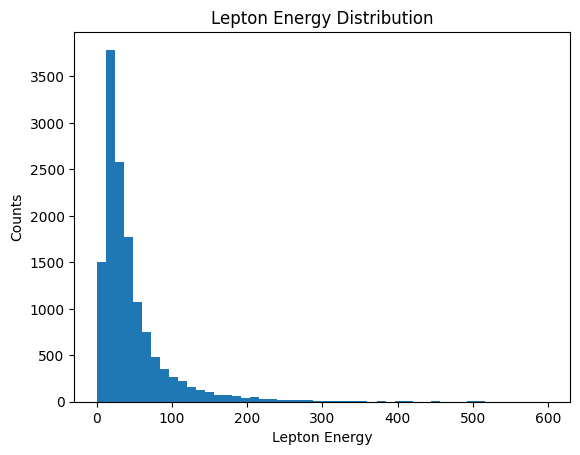

In [ ]:
plt.hist(lep_e_np, bins=50, range=(0,600))
plt.xlabel("Lepton Energy")
plt.ylabel("Counts")
plt.title("Lepton Energy Distribution")
plt.show()

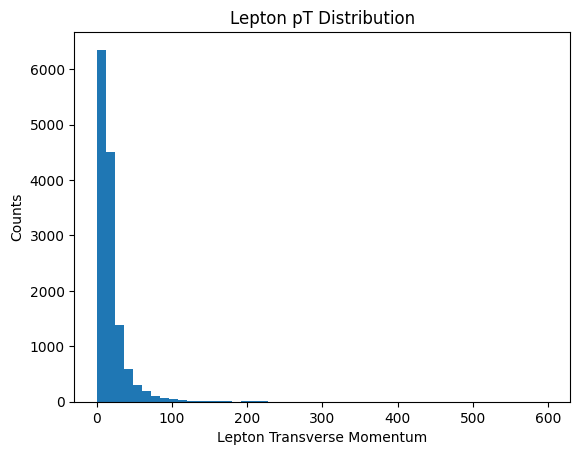

In [ ]:
lep_pt = tree["lep_pt"].arrays(library="ak")["lep_pt"]
lep_pt_flat = ak.flatten(lep_pt)
lep_pt_np = ak.to_numpy(lep_pt_flat)
plt.hist(lep_pt_np, bins=50, range=(0,600))
plt.xlabel("Lepton Transverse Momentum")
plt.ylabel("Counts")
plt.title("Lepton pT Distribution")
plt.show()

Remember that for our anlaysis we want leptons that are isolated, have opposite charges and are of the same lepton type. We then ultimately want to calculate an invariant mass and plot this.

#What variables are we intrested in?

# Week 2

In [ ]:
variables = [...]

## Cuts
We now want to actually filter out events to make sure that we are looking at data that we want to be looking at. The dataset that we used already makes sure that every event has exactly four leptons. Let's see how to make the lepton type requirement

In [ ]:
# Grab the first entry in our array
entry = tree.arrays(library='ak')[2:3]
lep_type = entry['lep_type']
lep_type

<Array [[11, 11, 13, 13]] type='1 * var * int32'>

The lepton type is encode in this number. These numbers come for something called the pdgID. These map the numbers to actual particles. The mapping can be found [here](https://www.phy.bnl.gov/twister/bee/particles/)

In [ ]:
# We either want an electron and positron or a muon and antimuon (ie. 11 or 13 )
lep_type = entry['lep_type']
sum_lep_type = lep_type[:, 0] + lep_type[:, 1] + lep_type[:, 2] + lep_type[:, 3]
lep_type_cut_bool = (sum_lep_type != 44) & (sum_lep_type != 48) & (sum_lep_type != 52)
print(f"Cut for lepton type? {lep_type_cut_bool}")

Cut for lepton type? [False]


Do a similar thing for the lepton charge

In [ ]:
...

Remember that we want to plot the invariant mass of the four leptons. The invariant mass can be obtained through this formula.

 $$m_\text{4l} = \sqrt{E^2_\text{tot}-\mathbf{p}_\text{tot}\cdot\mathbf{p}_\text{tot}}$$
in units where $c=1$.
$E_\text{tot}$ is the total energy and $\mathbf{p}_\text{tot}$ is the total momentum.
This calculation is performed using the vector array method `.M` on the sum of lepton 4-momenta (`lep_pt`,`lep_eta`,`lep_phi`,`lep_E`).


In [ ]:
# Calculate invariant mass of the 4-lepton state
# [:, i] selects the i-th lepton in each event
p4 = vector.zip({"pt": entry['lep_pt'], "eta": entry['lep_eta'], "phi": entry['lep_phi'], "E": entry['lep_e']})
invariant_mass = (p4[:, 0] + p4[:, 1] + p4[:, 2] + p4[:, 3]).M # .M calculates the invariant mass
print(f"Invariant mass: {invariant_mass}")

Invariant mass: [2.23]


## Place these selection criteria into functions so that we can use them over multiple events

In [ ]:
...

In [ ]:
# Add these cuts in too
def cut_trig_match(lep_trigmatch):
    trigmatch = lep_trigmatch
    cut1 = ak.sum(trigmatch, axis=1) >= 1
    return cut1

def cut_trig(trigE,trigM):
    return trigE | trigM


def ID_iso_cut(IDel,IDmu,isoel,isomu,pid):
    thispid = pid
    return (ak.sum(((thispid == 13) & IDmu & isomu) | ((thispid == 11) & IDel & isoel), axis=1) == 4)

In [ ]:
# You can iterate over an entire dataset using this:

# Store output data in a list
sample_data = []
for data in tree.iterate(variables, library="ak"):
  lep_type = data['lep_type']
  # Apply cuts to data
  ...
  sample_data.append(...) # Replace with whatever you called data

# Turn data back to awkward array
data_A = ak.concatenate(sample_data)

## Homework
Create a plot of the 4-lepton invariant mass.
Do you see anything special around the mass of the Higgs boson (125 GeV)?[link text](https://)